In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
# 1) UNDERSTANDING THE DATA

In [48]:
#Import the data and view first 5 rows
df=pd.read_csv("udemy_courses.csv")
df.head()


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [49]:
#view last 5 rows
df.tail()


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development
3677,297602,Using MODX CMS to Build Websites: A Beginner's...,https://www.udemy.com/using-modx-cms-to-build-...,True,45,901,36,20,Beginner Level,2.0,2014-09-28T19:51:11Z,Web Development


In [50]:
#shape of the data
df.shape


(3678, 12)

In [51]:
#view a descriptive statistics of the dataset
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [52]:
#view columns in the dataset
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [53]:
#check for unique values in the data
df.nunique()

course_id              3672
course_title           3663
url                    3672
is_paid                   2
price                    38
num_subscribers        2197
num_reviews             511
num_lectures            229
level                     4
content_duration        105
published_timestamp    3672
subject                   4
dtype: int64

In [54]:
# 2)CLEANING THE DATA

In [55]:
#check for null values in the dataset
df.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [56]:
#drop redundant columns 
to_drop = ['course_id','url','content_duration','num_lectures','published_timestamp']
df.drop(to_drop, inplace=True, axis =1)



In [57]:
# view first 5 rows to confirm dropped columns
df.head()


,course_title,is_paid,price,num_subscribers,num_reviews,level,subject
0,Ultimate Investment Banking Course,True,200,2147,23,All Levels,Business Finance
1,Complete GST Course & Certification - Grow You...,True,75,2792,923,All Levels,Business Finance
2,Financial Modeling for Business Analysts and C...,True,45,2174,74,Intermediate Level,Business Finance
3,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,11,All Levels,Business Finance
4,How To Maximize Your Profits Trading Options,True,200,1276,45,Intermediate Level,Business Finance


In [58]:
#view the shape of the new dataset
df.shape

(3678, 7)

In [59]:
#check for outliers in data using interquatile range

#Q1 = df.quantile(0.25)
#Q3 = df.quantile(0.75)
#IQR = Q3 - Q1
#print(IQR)
#sns.catplot(x='content_duration', kind='box' , data =df)
#sns.catplot(x='price',kind='box' , data =df)
#sns.catplot(x='num_reviews',kind='box' , data =df)
#sns.catplot(x='num_lectures',kind='box' , data =df)



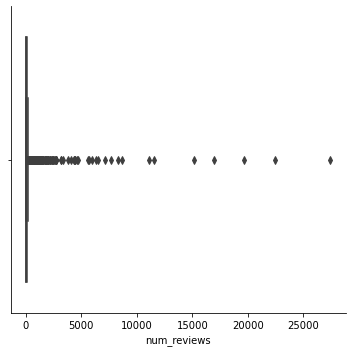

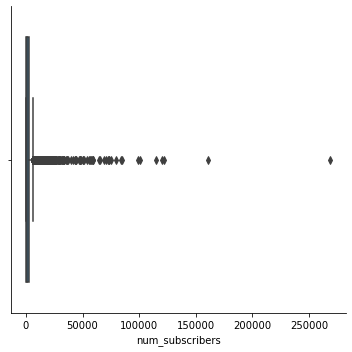

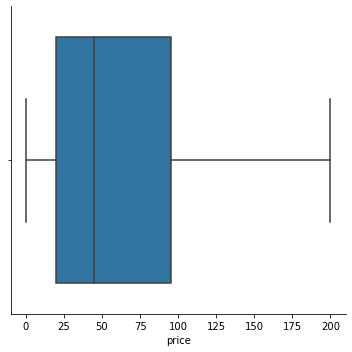

In [60]:
#check for outliers in the numerical data using boxplots
sns.catplot(x='num_reviews', kind='box' , data =df)
sns.catplot(x='num_subscribers', kind='box' , data =df)
sns.catplot(x='price', kind='box' , data =df)

In [61]:
#no outliers in price
#too many outliers in num_reviews and num_subscribers  but it only means that the data is not normally distributed, 
#however, we can still work with them

In [62]:
# viewing duplicate rows

duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)
print (duplicate_rows_df)

number of duplicate rows: (6, 7)
                                           course_title  is_paid  price  \
787   Essentials of money value: Get a financial Life !     True     20   
788   Introduction to Forex Trading Business For Beg...     True     20   
894                  Understanding Financial Statements     True     25   
1100                  CFA Level 2- Quantitative Methods     True     40   
1473                             MicroStation - Células     True     20   
2561  Learn Web Designing & HTML5/CSS3 Essentials in...     True     75   

      num_subscribers  num_reviews           level           subject  
787                 0            0      All Levels  Business Finance  
788                 0            0  Beginner Level  Business Finance  
894                 0            0      All Levels  Business Finance  
1100                0            0      All Levels  Business Finance  
1473                0            0  Beginner Level    Graphic Design  
2561           

In [63]:
#dropping the duplicate rows
df = df.drop_duplicates()
df.head(5)



,course_title,is_paid,price,num_subscribers,num_reviews,level,subject
0,Ultimate Investment Banking Course,True,200,2147,23,All Levels,Business Finance
1,Complete GST Course & Certification - Grow You...,True,75,2792,923,All Levels,Business Finance
2,Financial Modeling for Business Analysts and C...,True,45,2174,74,Intermediate Level,Business Finance
3,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,11,All Levels,Business Finance
4,How To Maximize Your Profits Trading Options,True,200,1276,45,Intermediate Level,Business Finance


In [64]:
#confirm duplicate rows have been dropped
df.shape

(3672, 7)

In [65]:
#view first 5 rows of cleaned dataset
df.head()

,course_title,is_paid,price,num_subscribers,num_reviews,level,subject
0,Ultimate Investment Banking Course,True,200,2147,23,All Levels,Business Finance
1,Complete GST Course & Certification - Grow You...,True,75,2792,923,All Levels,Business Finance
2,Financial Modeling for Business Analysts and C...,True,45,2174,74,Intermediate Level,Business Finance
3,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,11,All Levels,Business Finance
4,How To Maximize Your Profits Trading Options,True,200,1276,45,Intermediate Level,Business Finance


In [66]:
#outliers

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

is_paid               0.0
price                75.0
num_subscribers    2437.0
num_reviews          63.0
dtype: float64


In [67]:
#drop outliers
#df = df[~((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
#df.shape

In [68]:
df.head()

,course_title,is_paid,price,num_subscribers,num_reviews,level,subject
0,Ultimate Investment Banking Course,True,200,2147,23,All Levels,Business Finance
1,Complete GST Course & Certification - Grow You...,True,75,2792,923,All Levels,Business Finance
2,Financial Modeling for Business Analysts and C...,True,45,2174,74,Intermediate Level,Business Finance
3,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,11,All Levels,Business Finance
4,How To Maximize Your Profits Trading Options,True,200,1276,45,Intermediate Level,Business Finance


In [69]:
# HiSTOGRAMS

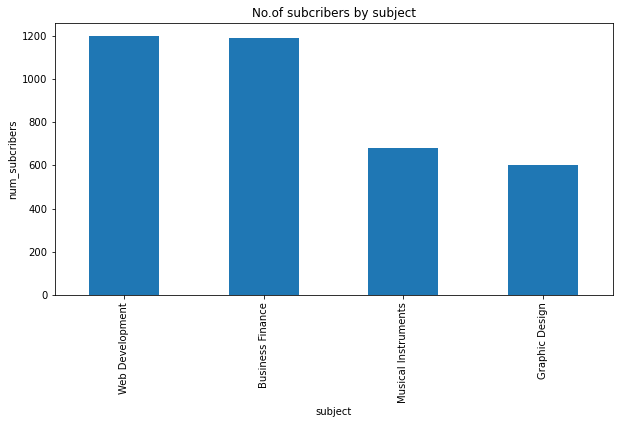

In [70]:

# Which subject has the highest number of  subscibers?
df.subject.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('No.of subcribers by subject')
plt.ylabel('num_subcribers')
plt.xlabel('subject');

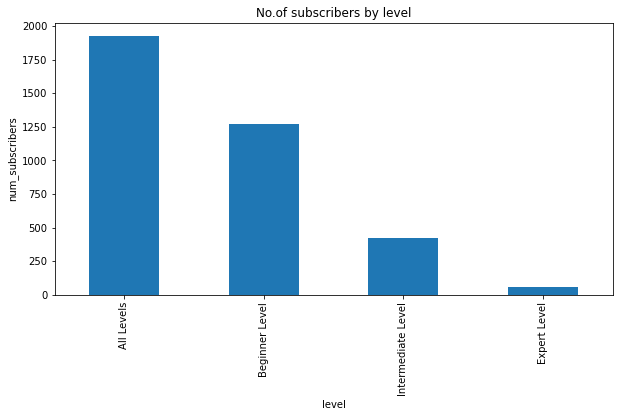

In [71]:
#The number of subscribers enrolled in the different levels 
df.level.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('No.of subscribers by level')
plt.ylabel('num_subscribers')
plt.xlabel('level');


In [72]:
# 3) RELATIONSHIP ANALYSIS

,is_paid,price,num_subscribers,num_reviews
is_paid,1.000000,0.328910,-0.267056,-0.087445
price,0.328910,1.000000,0.050436,0.113568
num_subscribers,-0.267056,0.050436,1.000000,0.651070
num_reviews,-0.087445,0.113568,0.651070,1.000000


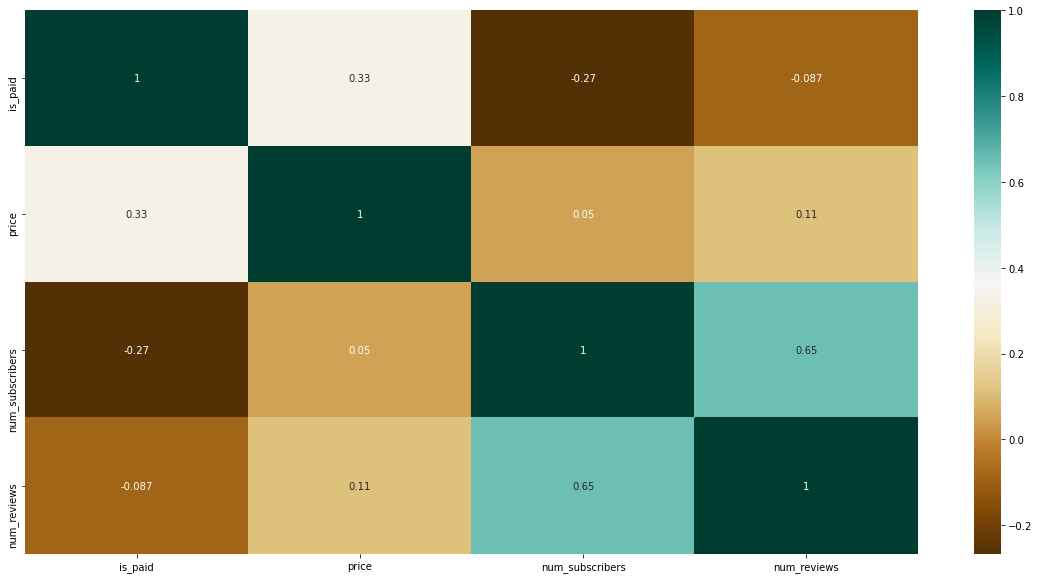

In [73]:
#corelation matrix: showing co-efficient corelation between variables
#corelation = df.corr()
#sns.heatmap(corelation, xticklabels = corelation.columns, yticklabels = corelation.columns, annot = True)
#corelation

plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

#0 indicates no linear relationship, +1 indicates a perfect +ve r/ship , -1 indicates a perfect -ve linear r/ship, values 
    # I.between 0 and 0.3/-0.3 indicate a weak +ve/-ve r/ship
    # II.between 0.3/-0.3 and 0.7/-0.7 indicate a moderate +ve/-ve r/ship
     # II.between 0.7/-0.7 and 1.0/-1.0 indicate a strong +ve/-ve r/ship
    

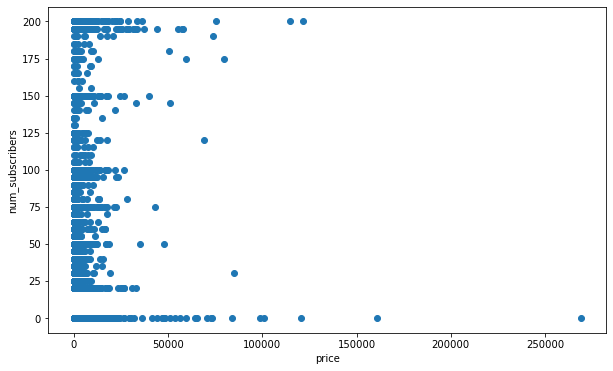

In [74]:
#Plotting a scatter plot to find correlation between variables

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['num_subscribers'], df['price'])
ax.set_xlabel('price')
ax.set_ylabel('num_subscribers')
plt.show()

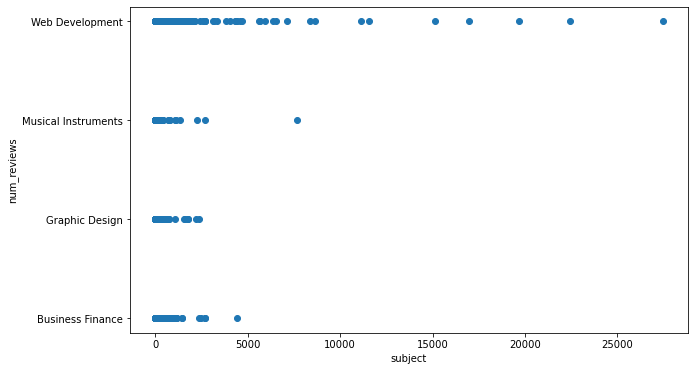

In [75]:
#Plotting a scatter plot to find correlation between variables

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['num_reviews'], df['subject'])
ax.set_xlabel('subject')
ax.set_ylabel('num_reviews')
plt.show()

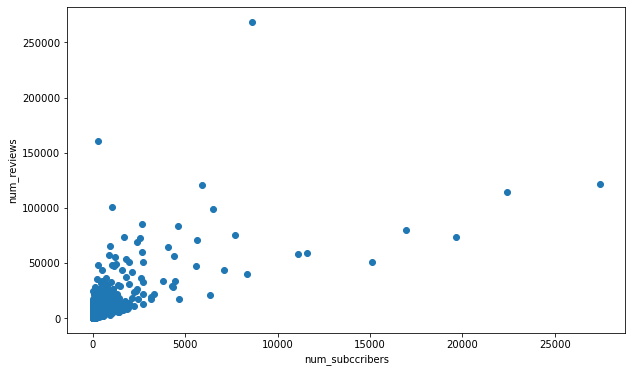

In [76]:
#Plotting a scatter plot to find correlation between variables

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['num_reviews'], df['num_subscribers'])
ax.set_xlabel('num_subccribers')
ax.set_ylabel('num_reviews')
plt.show()

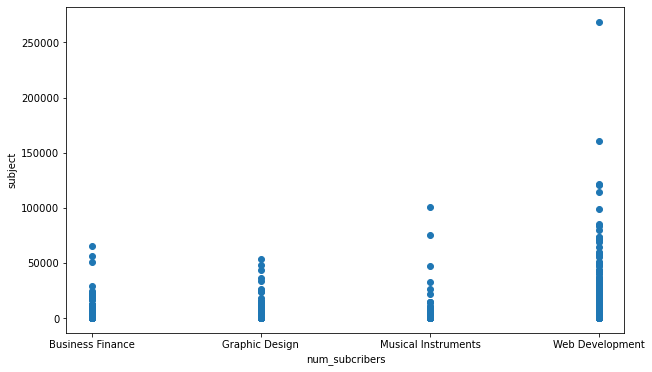

In [77]:
#Plotting a scatter plot to find correlation between variables

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['subject'], df['num_subscribers'])
ax.set_xlabel('num_subcribers')
ax.set_ylabel('subject')
plt.show()

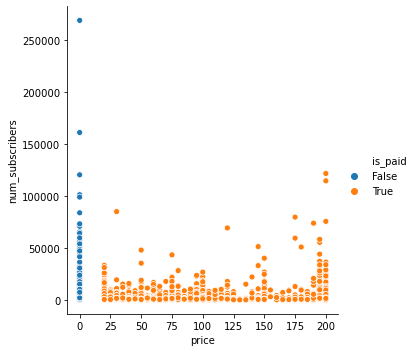

In [78]:
#Plotting a scatter plot to find correlation between price and number of subscribers

sns.relplot(x='price', y= 'num_subscribers', hue='is_paid', data =df)

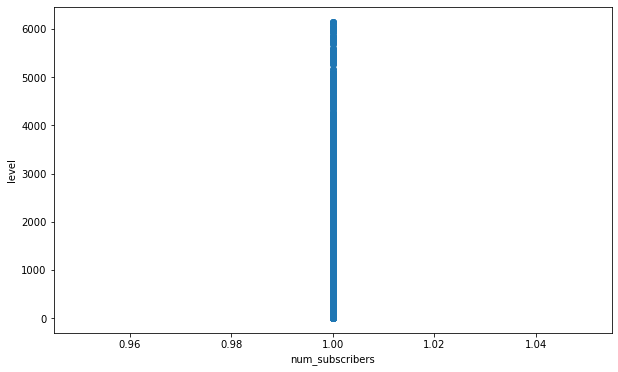

In [37]:
#Plotting a scatter plot to find correlation between variables

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['is_paid'], df['num_subscribers'])
ax.set_xlabel('num_subscribers')
ax.set_ylabel('level')
plt.show()